# Titanic Survival Prediction

# Introduction

We will use the classic Titanic dataset. The dataconsists of demographic and traveling information for 418 of the Titanic passengers, and the goal isto predict the survival of these passengers.This dataset contains information about general information and detail of each passengers.

# 1 Importing Libraries 

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# 2 Loading the dataset

In [92]:
titanic = pd.read_csv('tested.csv')
titanic

PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...   ...    ...    ...   
413                            Spector, Mr. Woolf    male   NaN      0      0   
414                  Oliva y Ocana, Dona. Fermina  female  39.0      0      0   
415                  Saether, Mr. Simon Sivertsen    male  38.5      0      0   
416                           Ware, Mr. Frederick    male   NaN      0      0   
417                      Peter, Master. Michael J    male   NaN      1      1   

                 Ticket      Fare Cabin Embarked  
0                330911    7.8292   NaN        Q  
1                363272    7.0000   NaN        S  
2                240276    9.6875   NaN        Q  
3                315154    8.6625   NaN        S  
4               3101298   12.2875   NaN        S  
..                  ...       ...   ...      ...  
413           A.5. 3236    8.0500   NaN        S  
414            PC 17758  108.9000  C105        C  
415  SOTON/O.Q. 3101262    7.2500   NaN        S  
416              359309    8.0500   NaN        S  
417                2668   22.3583   NaN        C  

[418 rows x 12 columns]

# 3 Understanding of data

In [93]:
titanic.head(10)

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   
5          897         0       3   
6          898         1       3   
7          899         0       2   
8          900         1       3   
9          901         0       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
5                    Svensson, Mr. Johan Cervin    male  14.0      0      0   
6                          Connolly, Miss. Kate  female  30.0      0      0   
7                  Caldwell, Mr. Albert Francis    male  26.0      1      1   
8     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female  18.0      0      0   
9                       Davies, Mr. John Samuel    male  21.0      2      0   

      Ticket     Fare Cabin Embarked  
0     330911   7.8292   NaN        Q  
1     363272   7.0000   NaN        S  
2     240276   9.6875   NaN        Q  
3     315154   8.6625   NaN        S  
4    3101298  12.2875   NaN        S  
5       7538   9.2250   NaN        S  
6     330972   7.6292   NaN        Q  
7     248738  29.0000   NaN        S  
8       2657   7.2292   NaN        C  
9  A/4 48871  24.1500   NaN        S

In [94]:
titanic.tail(10)

PassengerId  Survived  Pclass  \
408         1300         1       3   
409         1301         1       3   
410         1302         1       3   
411         1303         1       1   
412         1304         1       3   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                                Name     Sex   Age  SibSp  \
408                  Riordan, Miss. Johanna Hannah""  female   NaN      0   
409                        Peacock, Miss. Treasteall  female   3.0      1   
410                           Naughton, Miss. Hannah  female   NaN      0   
411  Minahan, Mrs. William Edward (Lillian E Thorpe)  female  37.0      1   
412                   Henriksson, Miss. Jenny Lovisa  female  28.0      0   
413                               Spector, Mr. Woolf    male   NaN      0   
414                     Oliva y Ocana, Dona. Fermina  female  39.0      0   
415                     Saether, Mr. Simon Sivertsen    male  38.5      0   
416                              Ware, Mr. Frederick    male   NaN      0   
417                         Peter, Master. Michael J    male   NaN      1   

     Parch              Ticket      Fare Cabin Embarked  
408      0              334915    7.7208   NaN        Q  
409      1  SOTON/O.Q. 3101315   13.7750   NaN        S  
410      0              365237    7.7500   NaN        Q  
411      0               19928   90.0000   C78        Q  
412      0              347086    7.7750   NaN        S  
413      0           A.5. 3236    8.0500   NaN        S  
414      0            PC 17758  108.9000  C105        C  
415      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416      0              359309    8.0500   NaN        S  
417      1                2668   22.3583   NaN        C

In [95]:
titanic.shape

(418, 12)

In [96]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [97]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# 4  Data Preprocessing

In [98]:
# Checking null values

titanic.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [99]:
# Handling the null values 

titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].mean())

In [100]:
#checking duplicate values

dup = titanic.duplicated().sum()
print("The number of duplicated values in the dataset are: ", dup)

The number of duplicated values in the dataset are:  0


In [101]:
Embarked = titanic['Embarked'].unique()
for Embarkeds in Embarked:
    print("->",Embarkeds)

-> Q
-> S
-> C


In [102]:
titanic['Embarked'] = titanic['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)
titanic['Sex'] = titanic['Sex'].map( {'female': 1,'male':0}).astype(int)


In [103]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int32
dtype: object

In [105]:
titanic['Age'] = titanic['Age'].astype(int)

In [107]:
titanic['Fare'] = titanic['Fare'].astype(int)
data = titanic.drop(['PassengerId','Name','Cabin','Ticket'], axis =1, inplace=True)

In [109]:
titanic.head()

Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0         0       3    0   34      0      0     7         0
1         1       3    1   47      1      0     7         1
2         0       2    0   62      0      0     9         0
3         0       3    0   27      0      0     8         1
4         1       3    1   22      1      1    12         1

# Data Visualization

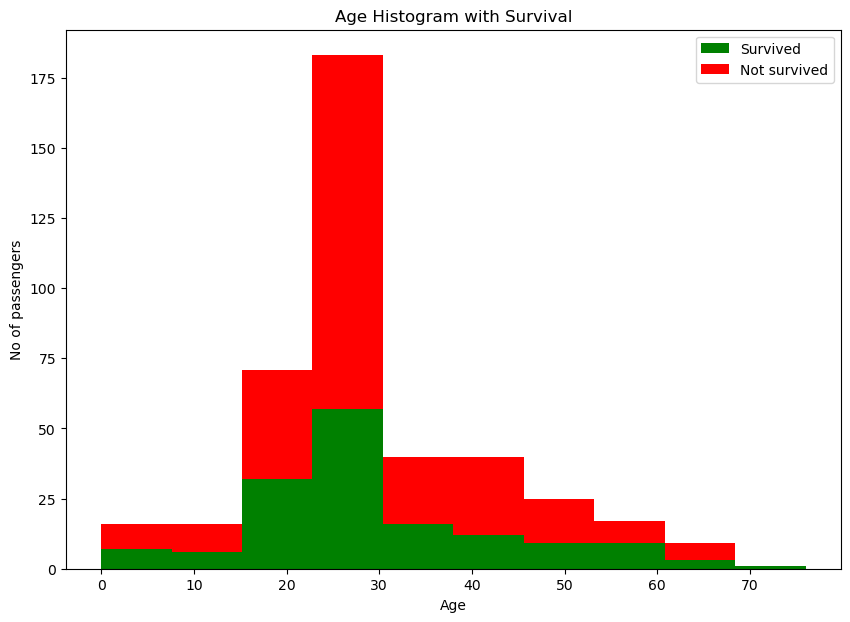

In [112]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [titanic[titanic['Survived']==1]['Age'], titanic[titanic['Survived']==0]['Age']],stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

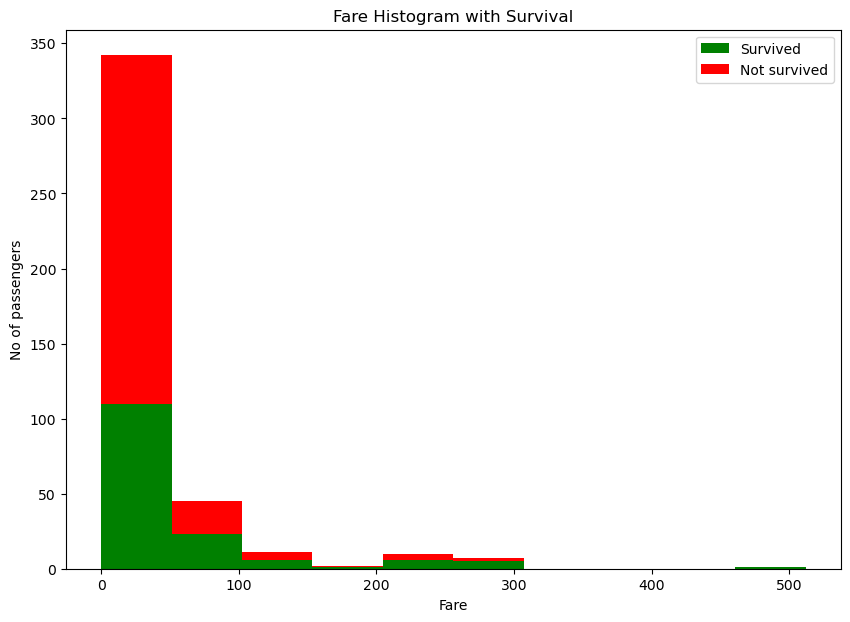

In [114]:
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [titanic[titanic['Survived']==1]['Fare'], titanic[titanic['Survived']==0]['Fare']], stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()

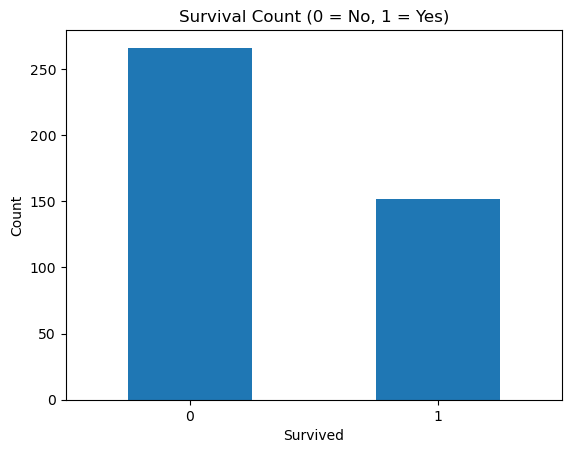

In [116]:
column = 'Survived'

# Create a bar chart
survival_counts = titanic[column].value_counts()
survival_counts.plot(kind='bar', rot=0)

# Adding labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count (0 = No, 1 = Yes)')

# Show the plot
plt.show()

# 4. spliting the data

In [117]:
Train = titanic.drop(['Survived'], axis=1)
Test = titanic.iloc[:,1]
x_train, x_test, y_train, y_test = train_test_split(Train, Test, test_size = 0.2, random_state = 1)

# 5.Model Building


In [118]:
LR = LogisticRegression(solver='liblinear', max_iter=200)
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))

Logistic regression accuracy: 92.86%


# Great